# Data 512 Final Project

Qinglang Ye

## Introduction

Movie recommendation systems are widely used by apps and websites, but it is challenging to predict recommendation list for new users. This analysis aims to find out the correlation between a person’s personality traits and individual movie preference 
so that it can help engineers improve current recommendation algorithms. 

## Background

There are growing number of research focusing on exploring the relationship between personality and human behaviours and trying to build machine learning prediction models based on personality traits. 
For example, the research [Bottom-Up and Top-Down: Predicting Personality with Psycholinguistic and Language Model Features](https://github.com/yashsmehta/personality-prediction) proposes a novel deep learning-based model which integrates traditional psycholinguistic features with language model embeddings to predict personality from text data.

Besides, the research paper "[User Personality and User Satisfaction with Recommender Systems](https://link.springer.com/article/10.1007/s10796-017-9782-y)" performs a user satisfaction experiment with a live movie recommendation system and demonstrates that user preferences are highly related to personality traits. To quantify users' personality, the Ten-item Personality Inventory (TIPI) is applied to measure the personality traits.

## Research questions

1. What are the distributions of self-rated personality traits?
2. What are the impacts of different personality traits on movie ratings? 
    - Do people with higher score of openness (prefer new experience) give higher ratings for movies?
    - Do people with higher score of agreeableness (compassionate and cooperative) give higher ratings for movies?
3. Do people with high agreeableness (compassionate and cooperative) have different preference of people with high extraversion?


## Data 

[Top Personality Dataset](https://www.kaggle.com/arslanali4343/top-personality-dataset)

The dataset contains two files `2018-personality-data.csv` and `2018_ratings.csv`. The personality data assessed over 1800 users’ personality traits using the Ten-item Personality Inventory (TIPI). And the rating data records user ratings of levels of diversity, popularity, and serendipity of a given list of movies. This data was originally collected for training reccomendation systems based on user personality traits so it is very suitable for addressing my research goal. 


### 2018-personality-data.csv

| Column | Description |
|--------|-------------|
| `userid`   | The hashed user_id |
| `openness`   | Assessment score (from 1 to 7) assessing user tendency to prefer new experience. |
| `agreeableness`  | Assessment score (from 1 to 7) assessing user tendency to be compassionate and cooperative rather than suspicious and antagonistic towards others. |
| `emotional_stability` | Assessment score (from 1 to 7) assessing user tendency to have psychological stress. |
| `conscientiousness` | Assessment score (from 1 to 7) assessing user tendency to be organized and dependable, and show self-discipline. |
| `extraversion` | Assessment score (from 1 to 7) assessing user tendency to be outgoing. |
| `assigned metric` | One of "serendipity", "popularity", "diversity", "default". |
| `assigned condition` | One of "high", "medium", "low". |
| `movie_x (x is from 1 to 12)` | The list consists of 12 movies. These fields contain the ids of the twelve movies in the list. |
| `predicted_rating_x (x is from 1 to 12)` | The predicted rating of the corresponding movie_x for the user. |
| `is_personalized` | The response of the user to the question "This list is personalized for me" (1: Strongly Disagree, 5: Strongly Agree). |
| `enjoy_watching` | The response of the user to the question "This list contains movies I think I enjoyed watching" (1: Strongly Disagree, 5: Strongly Agree). |

### 2018_ratings.csv

| Column | Description |
|--------|-------------|
| `userid`   | The hashed user_id |
| `movie_id`  | The id of the movie that the user (corresponding to userId) rated |
| `rating` | The user rating (from 0.5 to 5 stars) |
| `tstamp` | The time when the user rated the movie |



## Methodology

This paper will first explore the general trends and relationships of five personality traits through basic EDA, including data cleaning, joining and key features selection. Due to the time constraints of this project, a machine learning model will not be fully implemented and tested. However, the research questions will be answered with visualizations and descriptive statistics because they are interpretable and easy to follow by people with less data science knowledge. 

## Process Steps and Findings  

### Packages and Settings

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sn

### Read raw data

In [42]:
ratings = pd.read_csv('data/2018_ratings.csv', header = 0)
personality = pd.read_csv('data/2018-personality-data.csv', header = 0)

display(ratings.head())
display(personality.head())

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02


,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


### Join two files a one table

In [43]:
full_data = pd.merge(ratings, personality, left_on = 'useri', right_on = 'userid')
full_data = full_data.drop(columns = ['useri'], axis = 1)
display(full_data)

,movie_id,rating,tstamp,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,1,5.0,2001-09-10 17:19:56,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,2,4.0,2001-09-28 11:34:55,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
2,3,4.0,2001-09-28 11:42:50,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
3,5,5.0,2001-09-28 11:27:30,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
4,6,4.0,2002-01-07 18:12:02,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
5,7,4.0,2001-09-21 14:09:24,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
6,10,4.0,2001-09-29 18:13:15,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
7,11,4.0,2001-09-21 11:54:21,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
8,12,4.0,2001-09-29 18:58:15,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
9,13,4.0,2001-09-14 15:29:46,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4


### Remove spaces in column names

In [44]:
print('Before')
print(full_data.columns)
full_data.columns = [c.strip() for c in full_data.columns]

print('After')
print(full_data.columns)

Before
Index([' movie_id', ' rating', ' tstamp ', 'userid', ' openness',
       ' agreeableness', ' emotional_stability', ' conscientiousness',
       ' extraversion', ' assigned metric', ' assigned condition', ' movie_1',
       ' predicted_rating_1', ' movie_2', ' predicted_rating_2', ' movie_3',
       ' predicted_rating_3', ' movie_4', ' predicted_rating_4', ' movie_5',
       ' predicted_rating_5', ' movie_6', ' predicted_rating_6', ' movie_7',
       ' predicted_rating_7', ' movie_8', ' predicted_rating_8', ' movie_9',
       ' predicted_rating_9', ' movie_10', ' predicted_rating_10', ' movie_11',
       ' predicted_rating_11', ' movie_12', ' predicted_rating_12',
       ' is_personalized', ' enjoy_watching '],
      dtype='object')
After
Index(['movie_id', 'rating', 'tstamp', 'userid', 'openness', 'agreeableness',
       'emotional_stability', 'conscientiousness', 'extraversion',
       'assigned metric', 'assigned condition', 'movie_1',
       'predicted_rating_1', 'movie_2', '

### Check for null values

In [45]:
full_data.isnull().sum()

movie_id               0
rating                 0
tstamp                 0
userid                 0
openness               0
agreeableness          0
emotional_stability    0
conscientiousness      0
extraversion           0
assigned metric        0
assigned condition     0
movie_1                0
predicted_rating_1     0
movie_2                0
predicted_rating_2     0
movie_3                0
predicted_rating_3     0
movie_4                0
predicted_rating_4     0
movie_5                0
predicted_rating_5     0
movie_6                0
predicted_rating_6     0
movie_7                0
predicted_rating_7     0
movie_8                0
predicted_rating_8     0
movie_9                0
predicted_rating_9     0
movie_10               0
predicted_rating_10    0
movie_11               0
predicted_rating_11    0
movie_12               0
predicted_rating_12    0
is_personalized        0
enjoy_watching         0
dtype: int64

### Check the categorical values and remove extra spaces

In [46]:
print('Before')
print(full_data['assigned metric'].unique())
print(full_data['assigned condition'].unique())

# remove space
full_data['assigned metric'] = full_data['assigned metric'].apply(lambda x : x.strip())
full_data['assigned condition'] = full_data['assigned condition'].apply(lambda x : x.strip())

print('After')
print(full_data['assigned metric'].unique())
print(full_data['assigned condition'].unique())

Before
[' serendipity' ' all' ' popularity' ' diversity']
[' high' ' default' ' medium' ' low']
After
['serendipity' 'all' 'popularity' 'diversity']
['high' 'default' 'medium' 'low']


### Since the category "all" is not clearly defined, we will exclude this for future analysis

In [47]:
full_data = full_data[full_data['assigned metric'] != 'all']

### Create new table calculating the average rating per person

In [48]:
avgerage_data = full_data.groupby('userid').agg('mean').reset_index()
avgerage_data[['userid', 'rating', 'openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']].to_csv('processed_data/personality per person.csv', header = True, index = False)

avg_rating = pd.read_csv('processed_data/personality per person.csv')
avg_rating.head()

,userid,rating,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,005fe8678214011d7f92e51f9a546d40,4.111111,5.5,6.0,2.0,4.5,1.0
1,0066fac81b62656f032c085d96e378f4,3.971545,4.5,4.5,2.5,4.5,4.0
2,00fa91e202f5e48aa34c05d97867fa74,3.327285,6.5,3.5,3.0,5.0,5.0
3,011aedbea90fb3b6d1e7a47526b3bee6,3.387879,5.5,4.0,3.0,1.5,2.5
4,013325441cd1755b18c58b8007646bb1,4.030303,6.5,6.5,6.0,7.0,5.0


## Finding 1: Distribution of personality traits

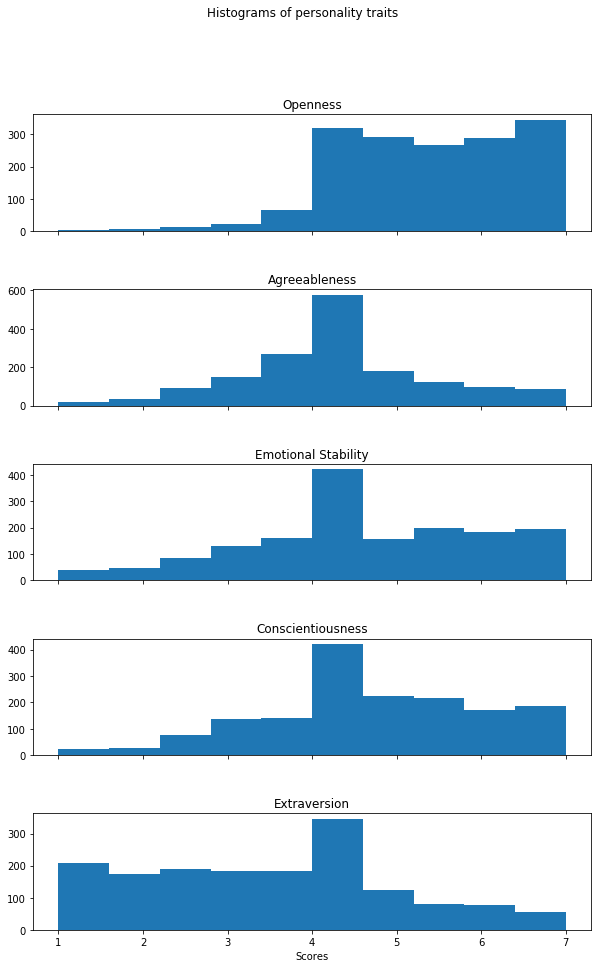

In [49]:
fig, axs = plt.subplots(5, sharex=True, figsize=(10,15), gridspec_kw={'hspace': 0.5})
fig.suptitle('Histograms of personality traits')

axs[0].hist(avg_rating.openness)
axs[0].set_title('Openness')
axs[1].hist(avg_rating.agreeableness)
axs[1].set_title('Agreeableness')
axs[2].hist(avg_rating.emotional_stability)
axs[2].set_title('Emotional Stability')
axs[3].hist(avg_rating.conscientiousness)
axs[3].set_title('Conscientiousness')
axs[4].hist(avg_rating.extraversion)
axs[4].set_title('Extraversion')
axs[4].set(xlabel='Scores')
# avg_rating.hist(['openness','agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion'])
for ax in axs.flat:
    ax.label_outer()
    # ax.set(xlabel='x-label')
plt.savefig('images/Histograms of personality traits.jpg')
plt.show()

To answer the first research question, first we want to check that if the population follows a normal distribution or a similar distribution when assessing the degree of their personality traits. Based on the histograms of five personality traits above, the answer is obviously no except for "agreeableness". There are clear distinctions in the rest of the distributions. The participants in this dataset tend to give high score for "openness", low for "extraversion" and about medium-high for "emotional stability" and "concientiousness". 

Therefore, this might be an internal bias if it is used as a training data. These features should be normalized before fitting in machine learning models.


## Finding 2: Relationship between agreeableness and movie ratings

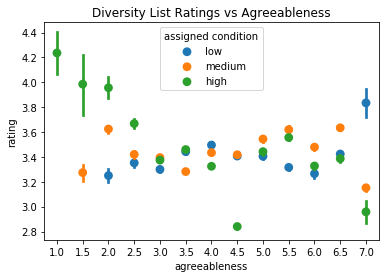

In [50]:
sn.pointplot(x = 'agreeableness', y = 'rating', data = full_data[(full_data['assigned metric'] == 'diversity')], join=False, hue = 'assigned condition', hue_order=['low', 'medium', 'high'])
plt.title('Diversity List Ratings vs Agreeableness')
plt.savefig('images/Diversity_Agreeableness.jpg')
plt.show()

The scatter plot above aims to show the relationship between users' agreeableness scores and the diversity of movies. Since the degree of diversity is recorded as a categorical value, which only has three types: low, medium and high. I use three colors to represent these three levels. The x-axis represents the score of agreeableness, the scatter points represent the average movie ratings in each category: low, medium and high diversity. The bars indicate the 1 standard deviation of the movie ratings in that group.

There is an opposite trend of how users consider movies labelled with high diversity to movies in the other two categories. As the agreeableness scores increases, people give higher scores to low and medium diversity movies but lower scores to high diversity movies. 

## Finding 3: Relationship between openness and movie ratings

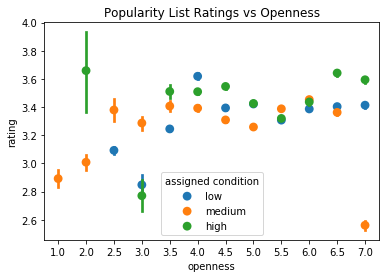

In [51]:
sn.pointplot(x = 'openness', y = 'rating', data = full_data[(full_data['assigned metric'] == 'popularity')], join=False, hue = 'assigned condition', hue_order=['low', 'medium', 'high'])
plt.title('Popularity List Ratings vs Openness')
plt.savefig('images/Popularity_Openness.jpg')
plt.show()

The plot setup is the same as the previous one while the only difference is that we are comparing the openness score versus the level of popularity for movies.

Here, we can see a consistent trend across all three levels of popularity that the ratings increase along with the score of openness. The distributions of average movie ratings are also bimodal with two peaks at 4.0 and about 6.5 points of openness. 

Comparing the two scatter plots together, the standard deviation of high diversity and high popularity movies are larger than the other categories. This result might imply that the participants do not agree on the standard of the movie labelling in this dataset. 

Based on the two findings above, we can answer the second research questoin that differnt personality traits have different impact on users' movie ratings. More importantly, people with differnt personality could still have various attitudes towards movies in different categories. 

## Finding 4: Relationship between extraversion and movie preference

No handles with labels found to put in legend.


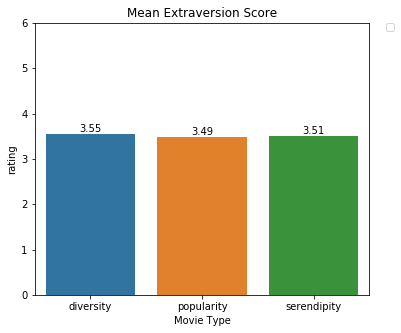

In [52]:
df_extra = full_data[(full_data.extraversion > 5) ].groupby(['assigned metric']).agg('mean')['rating'].reset_index()

plt.figure(figsize=(6, 5))
bp = sn.barplot(x = 'assigned metric', y = 'rating', data = df_extra)
plt.title('Mean Extraversion Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Movie Type')
plt.ylim((0,6))
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.savefig('images/Mean Extraversion Score.jpg')
plt.show()

For this analysis, I choose a subset of users who consider themselves as very outgoing (extraversion score > 5) and calculate the mean scores they give for movies in each category. According to the bar chart, there is no big difference in mean movie ratings for outgoing persons but they prefer movies categorized as diversity over serendipity over popularity. 

## Finding 5: Relationship between agreeableness and movie preference

No handles with labels found to put in legend.


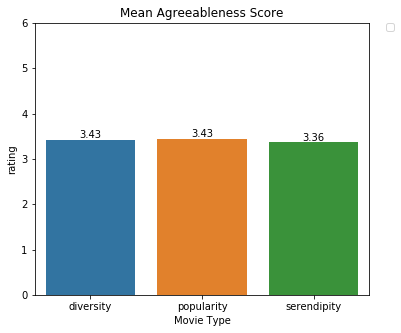

In [53]:
df_agree = full_data[full_data.agreeableness > 5].groupby(['assigned metric']).agg('mean')['rating'].reset_index()

plt.figure(figsize=(6, 5))
bp = sn.barplot(x = 'assigned metric', y = 'rating', data = df_agree,  hue_order=['low', 'medium', 'high'])
plt.title('Mean Agreeableness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Movie Type')
plt.ylim((0,6))
for p in bp.patches:
    bp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.savefig('images/Mean Agreeableness Score.jpg')
plt.show()

Similar to the previous analysis, I choose the users who rate themselves over 5 points in agreeableness as the highly agreeable subgroup of participants. Agreeable users are indifferent on the diversity and popularity but prefer them over serendipity. 

Still the difference among three movie categories are small but the preferene rank is different from extravert users'. Overall, extravert users give higher ratings than agreeable users. Therefore, we can answer the last research question: people with high agreeableness (compassionate and cooperative) have different preference of people with high extraversion.

## Limitations and Implications

As discussed in the first finding, the assesment scores of each personality traits are not evenly distributed so certain population groups are not fully represented by the dataset such as less open and highly extravert people. Since this dataset only does survey on 1800 participants, specific user information such as gender and age group is not indicated but these information should also be useful in training machine learning models. In order to answer the third research question, I calculate the average movie rating. However, further statistical analysis should be performed to justify if those differences in movie ratings are significant or not. 

## Conclusion

Through all the EDA in this project, we find significantly different in the distributions of the five personality traits. Based on all the charts that summarize the relationships among personality, movie rating and categories of movies, we can conclude that personality traits are highly correlated with movie ratings. And most importantly, people with different personality have different tastes. Thus, this anslysis show the existence of correlation between personality and movie preference so that future machine learning based recommendation models can include personality traits as a valuable predictor.

